<a href="https://colab.research.google.com/github/mukulre/Projects/blob/main/Ridge_and_Lasso_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("Advertising.csv")
print(data.head())

   Unnamed: 0     TV  Radio  Newspaper  Sales
0           1  230.1   37.8       69.2   22.1
1           2   44.5   39.3       45.1   10.4
2           3   17.2   45.9       69.3    9.3
3           4  151.5   41.3       58.5   18.5
4           5  180.8   10.8       58.4   12.9


In [3]:
data.drop(["Unnamed: 0"], axis=1, inplace=True)

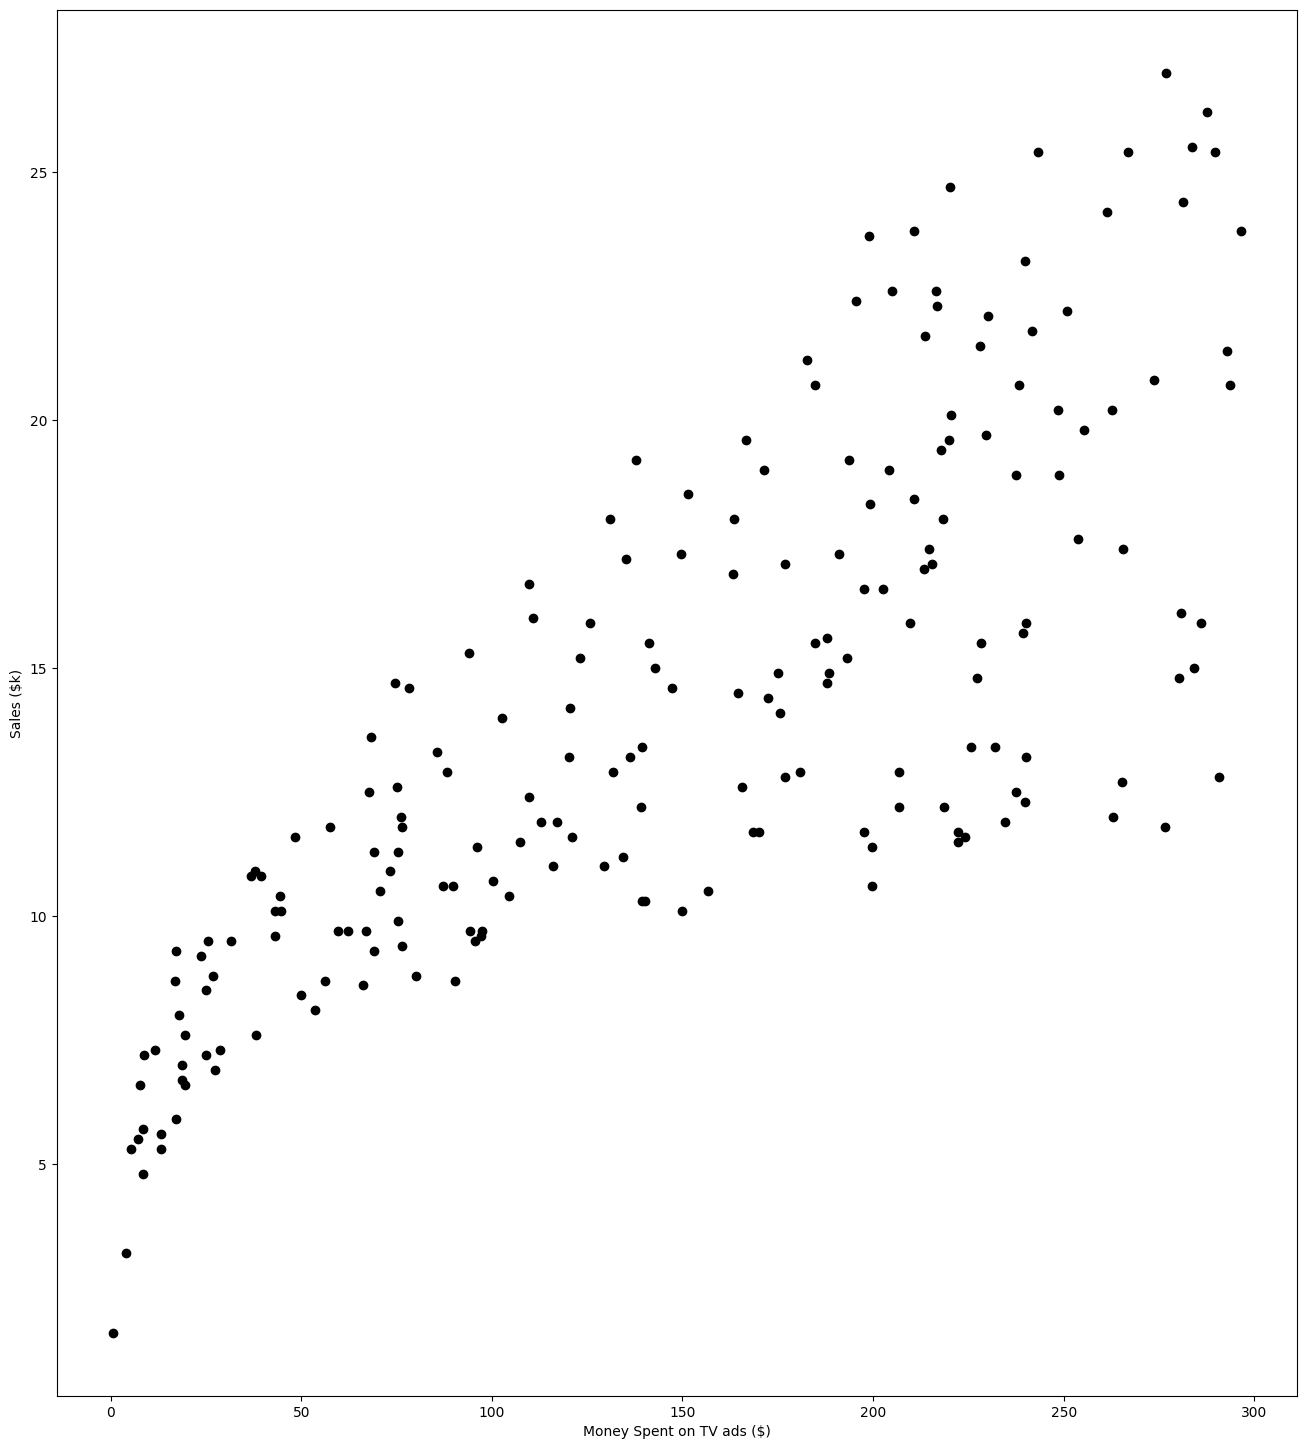

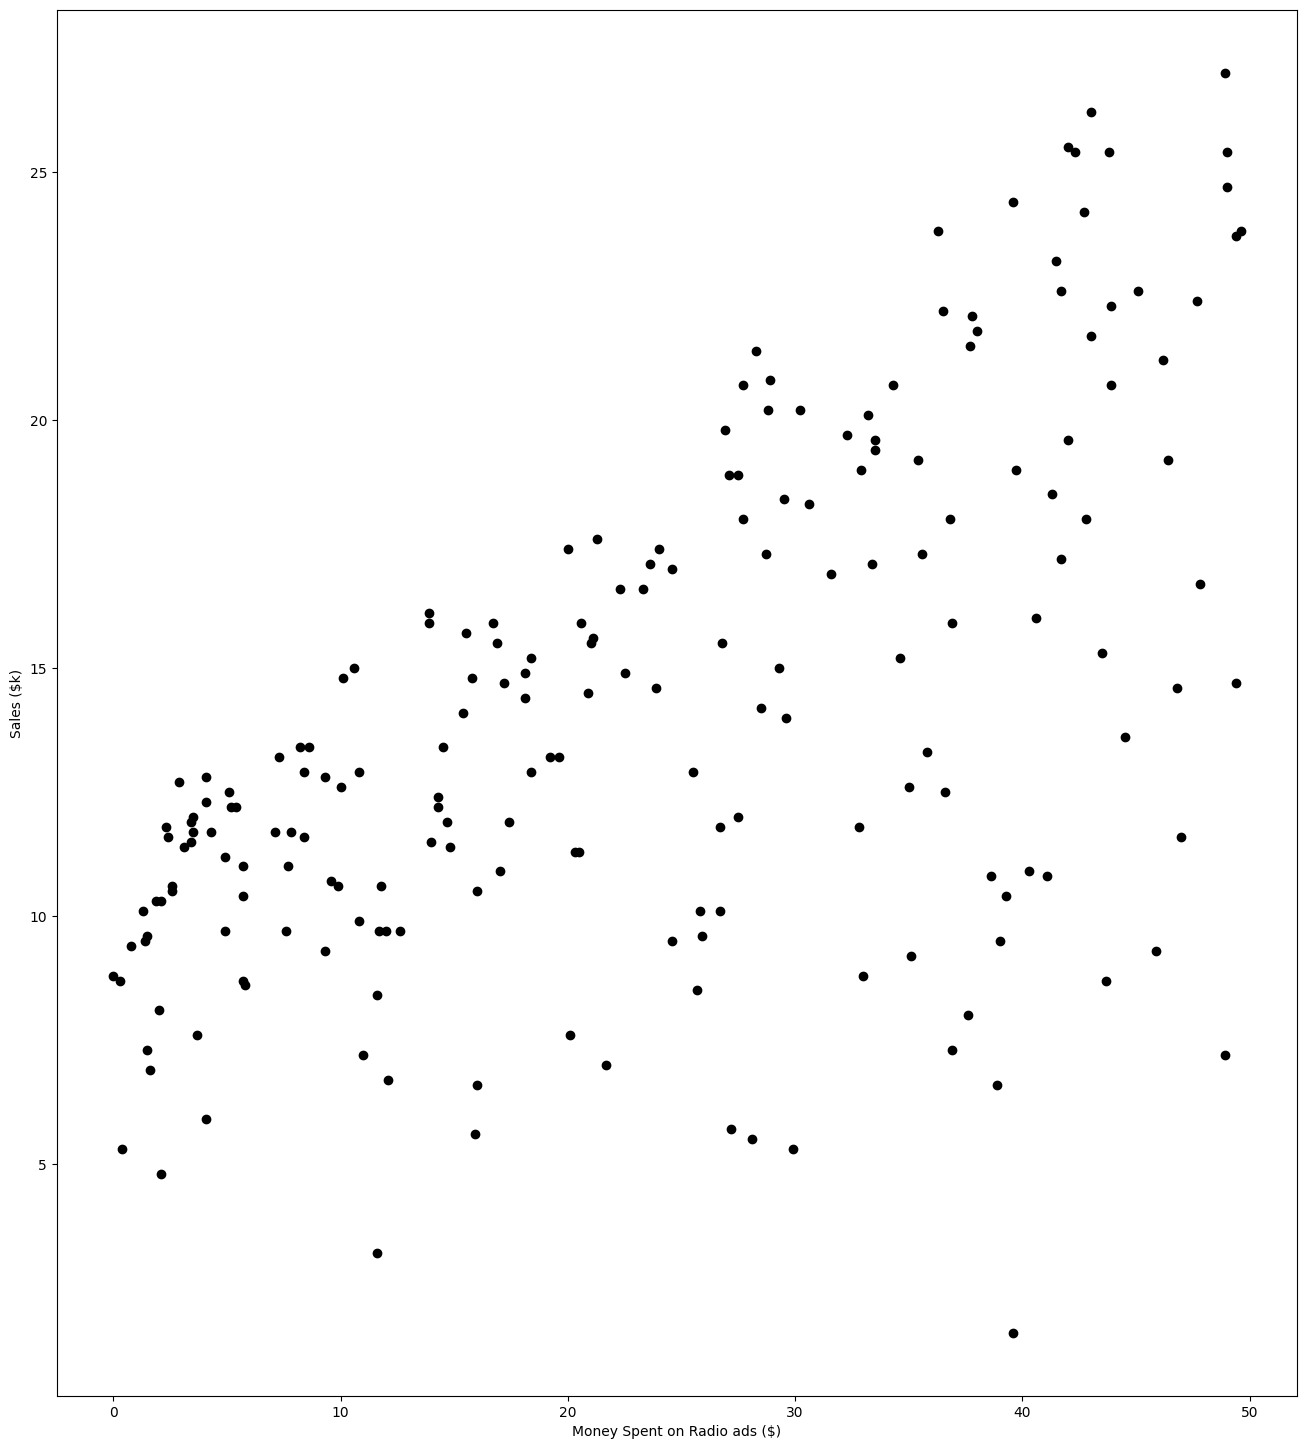

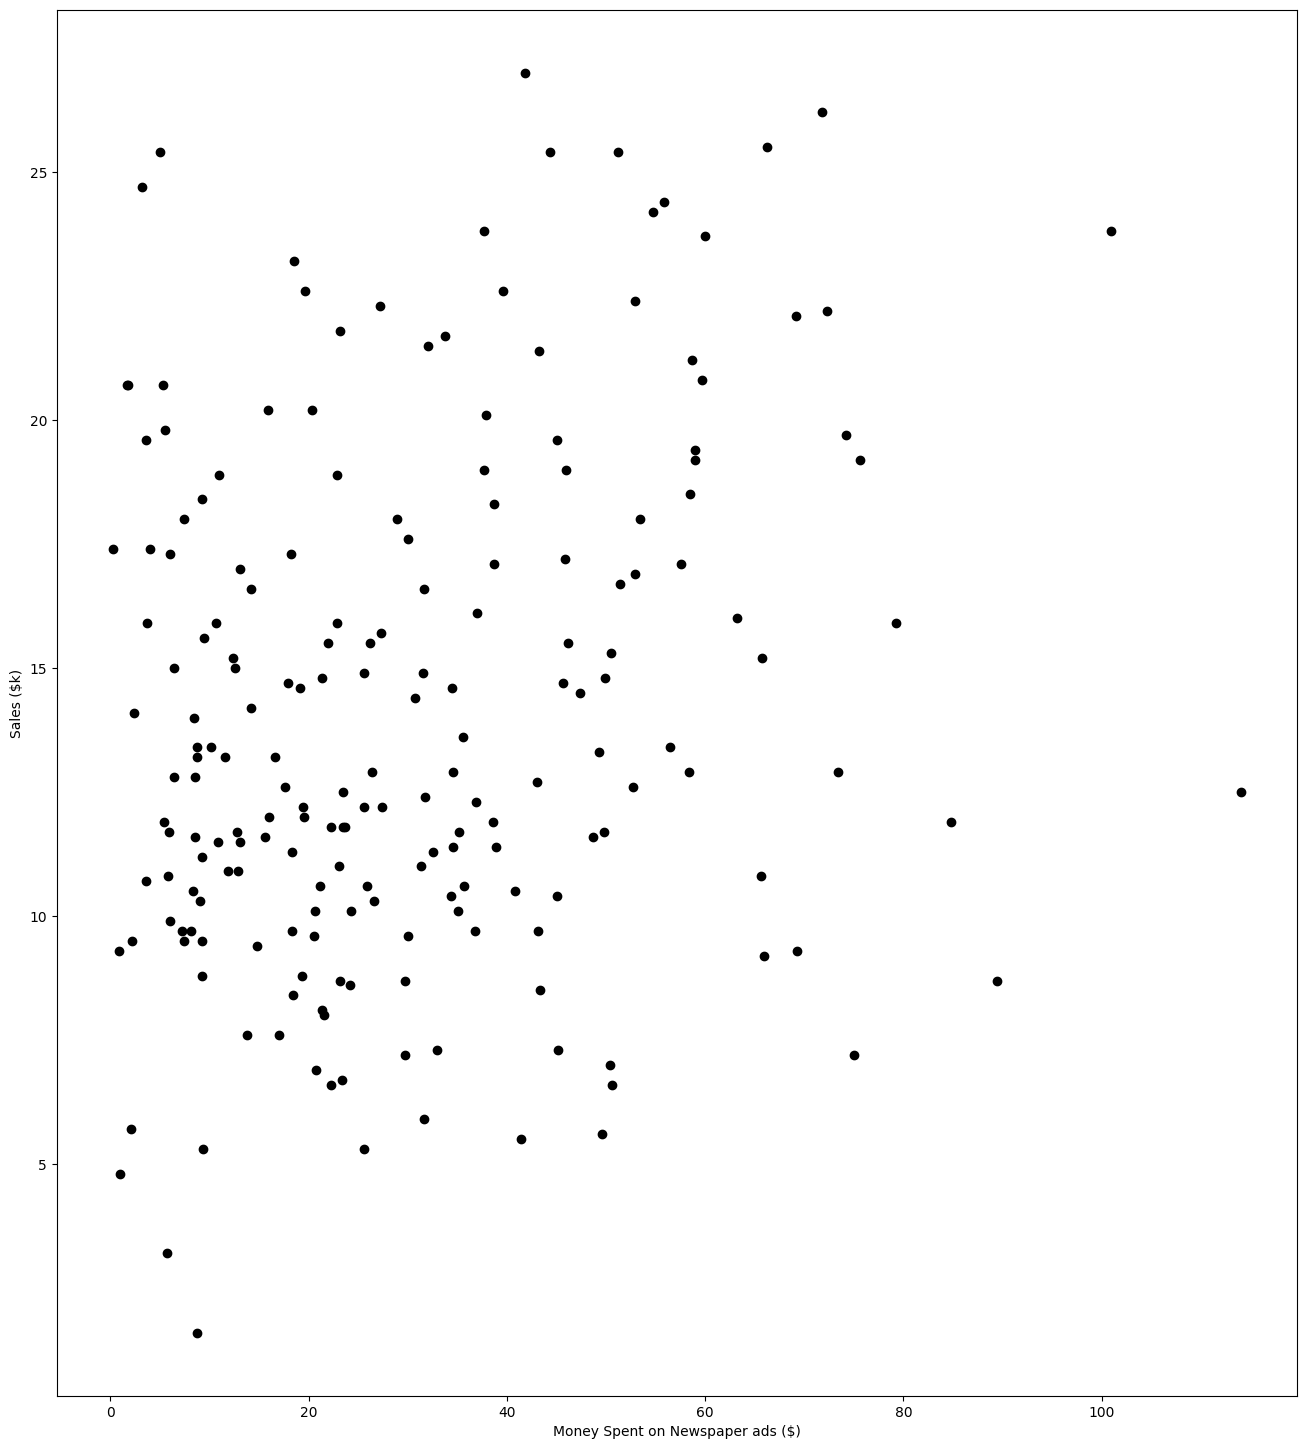

In [4]:
def scatter_plot(feature, target):
    plt.figure(figsize=(16, 18))
    plt.scatter(data[feature],
                data[target],
                c='black'
                )
    plt.xlabel("Money Spent on {} ads ($)".format(feature))
    plt.ylabel("Sales ($k)")
    plt.show()
scatter_plot("TV", "Sales")
scatter_plot("Radio", "Sales")
scatter_plot("Newspaper", "Sales")

In [5]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

xs = data.drop(["Sales"], axis=1)
y = data["Sales"].values.reshape(-1,1)
linreg = LinearRegression()
MSE = cross_val_score(linreg, xs, y, scoring="neg_mean_squared_error", cv=5)

mean_MSE = np.mean(MSE)
print(mean_MSE)

-3.0729465971002106


In [6]:
# Ridge Regression
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
ridge = Ridge()

parameters = {"alpha":[1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5, 10, 20]}
ridge_regression = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=5)
ridge_regression.fit(xs, y)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.0001, 0.001, 0.01, 1,
                                   5, 10, 20]},
             scoring='neg_mean_squared_error')

In [7]:
print(ridge_regression.best_params_)
print(ridge_regression.best_score_)

{'alpha': 20}
-3.072671338341143


In [8]:
from sklearn.linear_model import Lasso
lasso = Lasso()

parameters = {"alpha":[1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5, 10, 20]}
lasso_regression = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)
lasso_regression.fit(xs, y)

print(lasso_regression.best_params_)
print(lasso_regression.best_score_)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.090e+02, tolerance: 4.383e-01
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.385e+02, tolerance: 4.503e-01
  model = cd_fast.enet_coordinate_descent(


{'alpha': 1}
-3.041405896751369
